In [34]:
# Importing the required libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import community  # Louvain community detection

In [11]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [12]:
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [13]:
# Read in the netflix actor-director network

from networkx import is_connected

# Path to your GEXF file
gexf_file_path = "./movie_network_undirected.gexf"

# Read the GEXF file and create a graph object
netflix_graph = nx.read_gexf(gexf_file_path)

#netflix_graph = netflix_graph2.to_undirected()
print("Total Number of Nodes: ", netflix_graph.number_of_nodes())
print("Total Number of Edges: ", netflix_graph.number_of_edges())
print("Is graph connected? ", is_connected(netflix_graph))
#can disconnected components exist? Yes possible, as a actor can act and direct the same movie, and only one movie in the whole dataset.

degrees = [netflix_graph.degree(node) for node in netflix_graph]
kmin = min(degrees)
kmax = max(degrees)
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)
print("Average degree (alternate calculation)", np.mean(degrees)) #calculating the avg degree using graph calculation



Total Number of Nodes:  35133
Total Number of Edges:  95508
Is graph connected?  False

Minimum degree:  1
Maximum degree:  133
Average degree (alternate calculation) 5.436939629408249


In [14]:
#degree of WHAT DID JACK DO?
node_to_check = "WHAT DID JACK DO?"

# Get the neighbors of the specified node
neighbors = list(netflix_graph.neighbors(node_to_check))

print("Neighbors of node", node_to_check, ":", neighbors)

print(netflix_graph.degree(node_to_check)) # returns an integer

Neighbors of node WHAT DID JACK DO? : ['David Lynch']
1


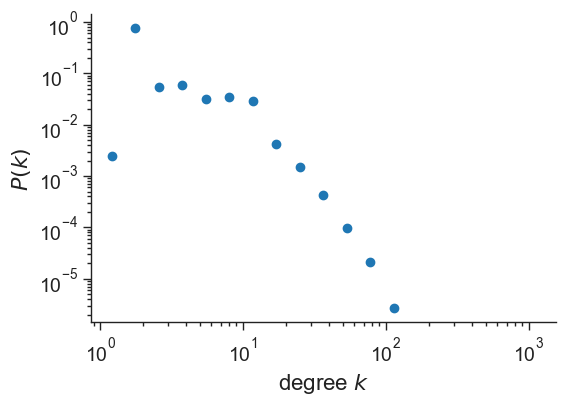

In [15]:
# Let's plot the degree distribution, by calling the function defined above.
plot_degree_dist(netflix_graph)

In [36]:

# Step 4: Community Detection using Louvain method
partition = community.best_partition(netflix_graph)

# Step 5: Print or Visualize Communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")


Community 0: ['My Little Pony: A New Generation', 'Robert Cullen', 'José Luis Ucha', 'Vanessa Hudgens', 'Kimiko Glenn', 'James Marsden', 'Sofia Carson', 'Liza Koshy', 'Ken Jeong', 'Elizabeth Perkins', 'Jane Krakowski', 'Michael McKean', 'Phil LaMarr', 'The Starling', 'Theodore Melfi', 'Melissa McCarthy', 'Kevin Kline', 'Timothy Olyphant', 'Skyler Gisondo', 'Laura Harrier', 'Rosalind Chao', 'Kimberly Quinn', 'Loretta Devine', 'Ravi Kapoor', 'Grown Ups', 'Dennis Dugan', 'Adam Sandler', 'Kevin James', 'Chris Rock', 'Rob Schneider', 'Maria Bello', 'Maya Rudolph', 'Colin Quinn', 'Joyce Van Patten', 'Keri Russell', 'Josh Hamilton', 'J.K. Simmons', 'Paranoia', 'Robert Luketic', 'Liam Hemsworth', 'Gary Oldman', 'Amber Heard', 'Lucas Till', 'Embeth Davidtz', 'Julian McMahon', 'Josh Holloway', 'Angela Sarafyan', 'Dennis Quaid', 'Safe House', 'Daniel Espinosa', 'Denzel Washington', 'Sam Shepard', 'Rubén Blades', 'Nora Arnezeder', 'Robert Patrick', 'Joel Kinnaman', 'Training Day', 'Antoine Fuqua',

In [ ]:
# Assuming you have your Netflix graph stored in netflix_graph and communities detected
# using Louvain method stored in partition dictionary

# Add community assignment as node attribute
nx.set_node_attributes(netflix_graph, partition, 'community')

# Export the graph to GraphML format
nx.write_graphml(netflix_graph, "netflix_graph_with_communities.graphml")

In [33]:
#Href: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities

#Href: https://stackoverflow.com/questions/22070196/community-detection-in-networkx


# Step 4: Community Detection using Louvain method
partition = community.best_partition(netflix_graph)

# Step 5: Print or Visualize Communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

# for community_id, nodes in communities.items():
#     print(f"Community {community_id}: {nodes}")
# Calculate modularity
modularity = community.modularity(partition, netflix_graph)

print("Modularity:", modularity)



Modularity: 0.8356093085165053


In [40]:
no_of_iterations = 10
for i in range (no_of_iterations):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [42]:
#run the commounity detection algorithm multiple times, get the average of the result

#creting a loop for the modularity detection.
modularity_list = []
modularity_running_sum = 0
no_of_iterations = 100
for i in range (no_of_iterations):
    # Step 4: Community Detection using Louvain method
    partition = community.best_partition(netflix_graph)
    modularity = community.modularity(partition, netflix_graph)
    print("Modularity :", modularity)
    modularity_running_sum = modularity_running_sum + modularity
    modularity_list.append(modularity)

print("Modularity List:", modularity_list)
print("Modularity running sum :", modularity_running_sum)
print("Modularity average :", modularity_running_sum/no_of_iterations)

# this takes about 17-18 minutes to finish



Modularity : 0.8335059685354848
Modularity : 0.8348126689853727
Modularity : 0.836945097045288
Modularity : 0.8347439305776188
Modularity : 0.835423872849453
Modularity : 0.8347851576275821
Modularity : 0.8352422343587576
Modularity : 0.8352367232073521
Modularity : 0.8369421693266119
Modularity : 0.8362571135780335
Modularity : 0.8354211171915292
Modularity : 0.833832134221509
Modularity : 0.8338462728575396
Modularity : 0.8339893154738856
Modularity : 0.8343579600491434
Modularity : 0.8352662924424407
Modularity : 0.8332411186363702
Modularity : 0.835490988547259
Modularity : 0.8347644582640731
Modularity : 0.8356921904935378
Modularity : 0.8362015770371918
Modularity : 0.8352397628011466
Modularity : 0.8355973993252004
Modularity : 0.8352273563383705
Modularity : 0.8368788785409834
Modularity : 0.834937397025456
Modularity : 0.8343403598072965
Modularity : 0.8355114929378162
Modularity : 0.8350460075938175
Modularity : 0.8355752204255846
Modularity : 0.8352657989531258
Modularity : 

In [5]:
#getting number of connected components of the graph
connected_components = list(nx.connected_components(netflix_graph))

num_components = nx.number_connected_components(netflix_graph)

print("Number of connected components:", num_components)

Number of connected components: 512


In [5]:
# Calculate the average clustering coefficient
average_cc = nx.average_clustering(netflix_graph)

print("Average Clustering Coefficient:", average_cc)

Average Clustering Coefficient: 0.6448355677952495


In [6]:
# Get the largest connected component
largest_component = max(nx.connected_components(netflix_graph), key=len)

# Create a subgraph containing only the largest connected component
largest_component_graph = netflix_graph.subgraph(largest_component)
print("Nodes in the largest connected component:", largest_component)
# Calculate the average clustering coefficient of the largest connected component
average_cc = nx.average_clustering(largest_component_graph)

print("Average Clustering Coefficient of the largest connected component:", average_cc)

Nodes in the largest connected component: {'Jillian Bell', 'Zed Plus', 'Charity Collins', 'İbrahim Büyükak', 'Rano Karno', 'Keshto Mukherjee', 'Dawn Olivieri', 'Miyavi', 'Dash Mihok', 'Tyrese Gibson', 'Tiya Sircar', 'A Sun', 'Mati Diop', "Michael O'Keefe", 'The American Meme', 'Rob Schneider: Asian Momma, Mexican Kids', 'The Bad Education Movie', 'Jesse Camacho', 'Jim Codrington', 'Adam Herschman', 'Mike Mills', 'Shohreh Aghdashloo', 'Chase Joliet', 'Kill Me If You Dare', 'Farhan Akhtar', 'Flavors of Youth: International Version', 'Ayushita', 'Çağlar Çorumlu', 'Julianne Hough', 'Lung Ti', 'Moe Dunford', 'Andrea Arcangeli', 'Prem Chopra', 'David McCracken', 'Mahesh Bhatt', 'Radek Lord', 'Vin Diesel', 'Walid Fawaz', 'Clayton Adams', 'Bülent Çolak', 'Isha Sharvani', 'Matt Reeves', 'Tiffany Fallon', 'Secun de la Rosa', 'Thelma Buabeng', 'Natasha Lyonne', 'Emilia Burns', 'Zeeshan Shafa', 'Ozan Güven', 'Ahmed Ezz', 'Greg Hsu', 'Patricia Heaton', 'J.J. Abrams', 'Chief Daddy', 'Soleiman Eid', 

In [7]:
# Calculate the average shortest path length in the graph
average_path_length = nx.average_shortest_path_length(largest_component_graph)

print("Average shortest path length in the graph:", average_path_length)

##there could be cycles in the graph

KeyboardInterrupt: 

In [8]:
#Finding node with highest degree(s)
#max degree --> kmax
#Min degree --> kmin
print("Degree sequence --> ")
print([netflix_graph.degree(node) for node in netflix_graph])

#reverse sort the list
print(sorted(degrees, reverse=True))
print("Max degree: ", kmax)

#getting the movie with highest degree
highest_movie_degree = -1
highest_movie_degree_nodes = []
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "movie"):
        if (netflix_graph.degree(node)) >= highest_movie_degree:
            highest_movie_degree = netflix_graph.degree(node)
print("Highest Degree in Movie --> ", highest_movie_degree)

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "movie"):
        if (netflix_graph.degree(node)) == highest_movie_degree:
            print("*")
            highest_movie_degree_nodes.append(node)

for movie in highest_movie_degree_nodes:
    print("Movie with highest degree: ", movie)

#finding the movie with highest degree
#finding degree of a node: print(netflix_graph.degree("Robert Cullen"))
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "movie"):
        if (netflix_graph.degree(node)) == kmax:
            print("Node With highest degree: {0}\t\t: {1}".format(node, data))  


Degree sequence --> 
[12, 11, 11, 15, 9, 26, 7, 5, 24, 9, 19, 7, 3, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 8, 14, 10, 10, 6, 6, 2, 4, 2, 20, 2, 12, 12, 2, 2, 6, 2, 4, 2, 2, 2, 2, 2, 2, 11, 45, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 11, 11, 10, 10, 4, 2, 2, 2, 6, 2, 2, 2, 7, 7, 4, 2, 2, 2, 20, 4, 6, 25, 27, 7, 7, 7, 3, 5, 5, 2, 18, 4, 7, 17, 6, 11, 16, 9, 12, 40, 32, 20, 29, 13, 15, 34, 20, 32, 14, 6, 2, 11, 42, 6, 7, 17, 4, 2, 2, 2, 2, 2, 2, 11, 66, 6, 23, 22, 20, 8, 11, 2, 4, 10, 4, 10, 16, 30, 19, 15, 8, 6, 20, 6, 9, 4, 11, 11, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 11, 2, 4, 8, 6, 4, 2, 4, 4, 2, 6, 10, 10, 4, 4, 4, 4, 7, 2, 2, 2, 2, 11, 126, 4, 2, 6, 4, 2, 4, 2, 2, 2, 11, 11, 2, 2, 2, 2, 2, 2, 11, 11, 35, 4, 2, 4, 13, 10, 2, 2, 2, 2, 9, 20, 2, 15, 5, 10, 6, 2, 10, 11, 11, 22, 28, 13, 28, 19, 4, 4, 22, 8, 4, 12, 51, 25, 8, 12, 10, 4, 14, 6, 12, 6, 14, 11, 28, 8, 10, 3, 8, 10, 8, 6, 4, 7, 2, 9, 6, 9, 5, 11, 3, 5, 3, 11, 2, 2, 11, 45, 14, 14, 9, 11, 5, 3, 5, 3, 3, 5, 12, 30, 6, 2, 2, 7, 6, 5, 4, 14, 

In [9]:
#getting actor with higest degree
highest_cast_degree = -1

highest_cast_degree_nodes = []
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "cast"):
        if (netflix_graph.degree(node)) >= highest_cast_degree:
            highest_cast_degree = netflix_graph.degree(node)
print("Highest Degree in Cast --> ", highest_cast_degree)

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "cast"):
        if (netflix_graph.degree(node)) == highest_cast_degree:
            print("*")
            highest_cast_degree_nodes.append(node)

for cast in highest_cast_degree_nodes:
    print("Cast with highest degree: ", cast)

#this guy only acted in 3-4 movies, but his interaction is a lot with other people
    

Highest Degree in Cast -->  84
*
Cast with highest degree:  Kunle Afolayan


In [10]:
#===============================
print("=================================")
#getting director with higest degree
highest_dir_degree = -1
highest_dir_degree_nodes = []
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "director"):
        if (netflix_graph.degree(node)) >= highest_dir_degree:
            highest_dir_degree = netflix_graph.degree(node)
print("Highest Degree in director --> ", highest_dir_degree)

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "director"):
        if (netflix_graph.degree(node)) == highest_dir_degree:
            print("*")
            highest_dir_degree_nodes.append(node)

for dirs in highest_dir_degree_nodes:
    print("Director with highest degree: ", dirs)


Highest Degree in director -->  133
*
Director with highest degree:  Martin Scorsese


### Degree Vs Number of Nodes

In [11]:
print("Degree sequence --> ")
print(sorted([netflix_graph.degree(node) for node in netflix_graph]))

#dictionary of degree and how many nodes have that degree
dict_degree_number = {}

#initialize the dict_degee_number dict
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

for degree in range(kmin-1, kmax+2):
    dict_degree_number[degree] = 0

# print([netflix_graph.degree(node) for node in netflix_graph].count(12))

print("dict_degree_number: (before)", dict_degree_number)
for node in netflix_graph:
   dict_degree_number[netflix_graph.degree(node)] = dict_degree_number[netflix_graph.degree(node)] + 1

print("dict_degree_number: (after)", dict_degree_number)

Degree sequence --> 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [6]:
#nodes with degree 1
degree_to_check = 1
deg_nodes = 0
for nodes in netflix_graph:
    if(netflix_graph.degree(nodes) == degree_to_check):
        deg_nodes = deg_nodes + 1
print(deg_nodes)

39


In [7]:
#movies with degree one

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (netflix_graph.degree(node)) == 1:
        if(data["type"] == 'movie'):
            print("Node {0}\t\t\t: {1}".format(node, data))  



Node Myriam Fares: The Journey			: {'type': 'movie', 'label': 'Myriam Fares: The Journey'}
Node Bo Burnham: Inside			: {'type': 'movie', 'label': 'Bo Burnham: Inside'}
Node Chris Rock Total Blackout: The Tamborine Extended Cut			: {'type': 'movie', 'label': 'Chris Rock Total Blackout: The Tamborine Extended Cut'}
Node Vir Das: Outside In - The Lockdown Special			: {'type': 'movie', 'label': 'Vir Das: Outside In - The Lockdown Special'}
Node La Gran Ilusión			: {'type': 'movie', 'label': 'La Gran Ilusión'}
Node Panoptic			: {'type': 'movie', 'label': 'Panoptic'}
Node Stars in the Sky: A Hunting Story			: {'type': 'movie', 'label': 'Stars in the Sky: A Hunting Story'}
Node WHAT DID JACK DO?			: {'type': 'movie', 'label': 'WHAT DID JACK DO?'}
Node Oththa Seruppu Size 7			: {'type': 'movie', 'label': 'Oththa Seruppu Size 7'}
Node Merata: How Mum Decolonised the Screen			: {'type': 'movie', 'label': 'Merata: How Mum Decolonised the Screen'}
Node HOMECOMING: A film by Beyoncé			: {'type': 'm

In [14]:
#graph


#make a bar graph out of it
x = list(dict_degree_number.keys())
y = list(dict_degree_number.values())
# Creating the bar graph

plt.figure(figsize=(20, 10))  # Adjust figure size as needed
#plt.bar(keys, values)

bars = plt.bar(x, y)

# Adding labels and title
plt.xlabel('TV - Ratings')
plt.ylabel('Occurances')
plt.title('Bar Graph of TV-Ratings')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the graph
plt.show()


In [9]:
#getting number of connected components of the graph
connected_components = list(nx.connected_components(netflix_graph))

num_components = nx.number_connected_components(netflix_graph)


print("Number of connected components:", num_components)

Number of connected components: 512


In [12]:
# Find the connected components
connected_components = list(nx.connected_components(netflix_graph))

# Get the nodes that belong to components with only one node
disconnected_nodes = [node for node in netflix_graph.nodes() if len([cc for cc in connected_components if node in cc]) == 1]

print("Disconnected nodes:", disconnected_nodes)

for nodes in disconnected_nodes:
    print(nodes)

Disconnected nodes: ['My Little Pony: A New Generation', 'Robert Cullen', 'José Luis Ucha', 'Vanessa Hudgens', 'Kimiko Glenn', 'James Marsden', 'Sofia Carson', 'Liza Koshy', 'Ken Jeong', 'Elizabeth Perkins', 'Jane Krakowski', 'Michael McKean', 'Phil LaMarr', 'Sankofa', 'Haile Gerima', 'Kofi Ghanaba', 'Oyafunmike Ogunlano', 'Alexandra Duah', 'Nick Medley', 'Mutabaruka', 'Afemo Omilami', 'Reggie Carter', 'Mzuri', 'The Starling', 'Theodore Melfi', 'Melissa McCarthy', "Chris O'Dowd", 'Kevin Kline', 'Timothy Olyphant', 'Daveed Diggs', 'Skyler Gisondo', 'Laura Harrier', 'Rosalind Chao', 'Kimberly Quinn', 'Loretta Devine', 'Ravi Kapoor', 'Je Suis Karl', 'Christian Schwochow', 'Luna Wedler', 'Jannis Niewöhner', 'Milan Peschel', 'Edin Hasanović', 'Anna Fialová', 'Marlon Boess', 'Victor Boccard', 'Fleur Geffrier', 'Aziz Dyab', 'Mélanie Fouché', 'Elizaveta Maximová', 'Confessions of an Invisible Girl', 'Bruno Garotti', 'Klara Castanho', 'Lucca Picon', 'Júlia Gomes', 'Marcus Bessa', 'Kiria Malheir

TypeError: 'list' object is not callable

***

***

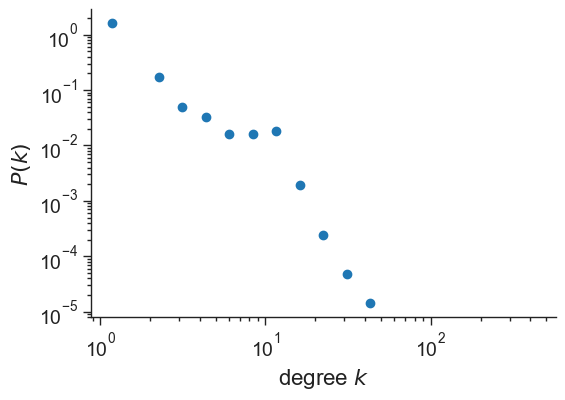

In [100]:
# Let's plot the degree distribution, by calling the function defined above.
plot_degree_dist(netflix_graph)

# Plotting the degree distribution

`numpy` can be used to get logarithmically-spaced bins between the minimum and maximum degree

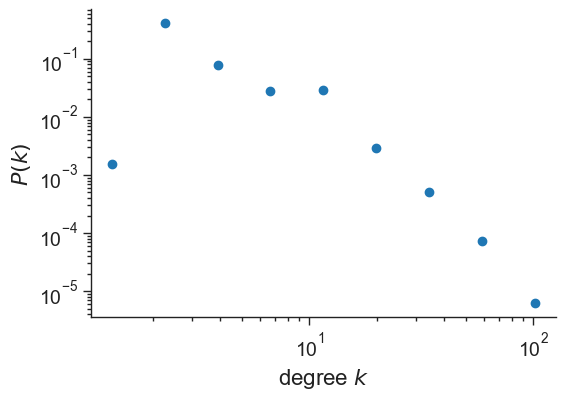

In [8]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2) #reversing the log

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

This is clearly not a network with anything like a heavy-tailed or power law degree distribution.
Let's also plot it in linear-linear scale.

The `linspace` command in `numpy` is used to get linearly-spaced numbers between two extremes

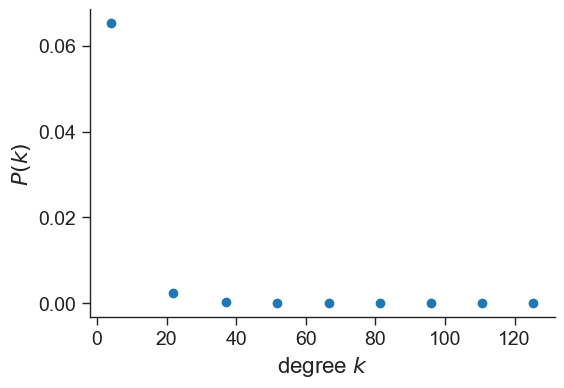

In [9]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

***

In [104]:
# Find the connected components
connected_components = list(nx.connected_components(netflix_graph))

# Get the nodes that belong to components with only one node
disconnected_nodes = [node for node in netflix_graph.nodes() if len([cc for cc in connected_components if node in cc]) == 1]

print("Disconnected nodes:", disconnected_nodes)

for nodes in disconnected_nodes:
    print(nodes)

Disconnected nodes: ['My Little Pony: A New Generation', 'Robert Cullen', 'José Luis Ucha', 'Vanessa Hudgens', 'Kimiko Glenn', 'James Marsden', 'Sofia Carson', 'Liza Koshy', 'Ken Jeong', 'Elizabeth Perkins', 'Jane Krakowski', 'Michael McKean', 'Phil LaMarr', 'Sankofa', 'Haile Gerima', 'Kofi Ghanaba', 'Oyafunmike Ogunlano', 'Alexandra Duah', 'Nick Medley', 'Mutabaruka', 'Afemo Omilami', 'Reggie Carter', 'Mzuri', 'The Starling', 'Theodore Melfi', 'Melissa McCarthy', "Chris O'Dowd", 'Kevin Kline', 'Timothy Olyphant', 'Daveed Diggs', 'Skyler Gisondo', 'Laura Harrier', 'Rosalind Chao', 'Kimberly Quinn', 'Loretta Devine', 'Ravi Kapoor', 'Je Suis Karl', 'Christian Schwochow', 'Luna Wedler', 'Jannis Niewöhner', 'Milan Peschel', 'Edin Hasanović', 'Anna Fialová', 'Marlon Boess', 'Victor Boccard', 'Fleur Geffrier', 'Aziz Dyab', 'Mélanie Fouché', 'Elizaveta Maximová', 'Confessions of an Invisible Girl', 'Bruno Garotti', 'Klara Castanho', 'Lucca Picon', 'Júlia Gomes', 'Marcus Bessa', 'Kiria Malheir

In [22]:
node_to_check = "Zubaan"

# Get the neighbors of the specified node
neighbors = list(netflix_graph.neighbors(node_to_check))

print("Neighbors of node", node_to_check, ":", neighbors)

Neighbors of node Zubaan : ['Sarah-Jane Dias', 'Meghna Malik', 'Vicky Kaushal', 'Manish Chaudhary', 'Mozez Singh', 'Raaghav Chanana', 'Malkeet Rauni', 'Anita Shabdish', 'Chittaranjan Tripathy']


In [106]:
node_to_check = "Menahi"

# Get the neighbors of the specified node
neighbors = list(netflix_graph.neighbors(node_to_check))

print("Neighbors of node", node_to_check, ":", neighbors)

print(netflix_graph.degree(node_to_check)) # returns an integer

Neighbors of node Menahi : ['Abdel Imam Abdullah', 'Ayman Makram', 'Fayez Al-Malki', 'Mona Wasef', 'Reem Abdel Aziz', 'Dana Jabr', 'Emad Al Youssef', 'Remas Mansoor', 'Khalid Mengah']
9


In [107]:
node_to_check = "Casino Tycoon"

# Get the neighbors of the specified node
neighbors = list(netflix_graph.neighbors(node_to_check))

print("Neighbors of node", node_to_check, ":", neighbors)

print(netflix_graph.degree(node_to_check)) # returns an integer

Neighbors of node Casino Tycoon : ['Wong Jing']
1


In [108]:
# Find isolated nodes
isolated_nodes = [node for node, degree in netflix_graph.degree() if degree == 0]

print("Isolated nodes:", isolated_nodes)

# Find the connected components
connected_components = list(nx.connected_components(netflix_graph))

print("Number of connected components:", len(connected_components))
print("Connected components:", connected_components)

Isolated nodes: []
Number of connected components: 512
Connected components: [{'Robert Zemeckis', 'Chetan', 'Kate Braithwaite', 'Doubt', 'Emily Rudd', 'Rik Reinholdtsen', 'Gurdip Kohli', 'Walter Koenig', 'Chelsea Magritte', 'Lynita Crofford', 'Patrick Catalifo', 'John Charles Njie', 'Majid Majidi', 'Rob Burnett', 'Jason Newman', 'Ashok Nanda', 'Sophie Traub', 'Tim Story', 'Lulu Antariksa', 'Erik Per Sullivan', 'Sapol Assawamunkong', 'Rusty Nixon', 'Tatiana Maslany', 'Mark Rylance', 'Charlotte Vega', 'Jhilmil Hazrika', 'Andre Jacobs', 'Indra Brotolaras', 'Dark Crimes', 'Rahasya Gorak', 'Fate of Alakada', 'Corbin Bernsen', 'Władysław Kowalski', 'Sasheer Zamata', 'Nirina Zubir', 'Kardec', 'Dave Chappelle', 'Horeya Farghaly', 'Aishwarya Rajesh', 'Maria Bamford: The Special Special Special', 'Kayode Olaiya', 'Vivek Mushran', 'Fanatic', 'Bassem Samra', 'Lucy Aarden', 'Atsushi Arai', 'Ravikanth Perepu', 'Torbaaz', 'Akara Amarttayakul', 'Alan Devlin', 'Seiji Mizushima', 'David Morse', 'Pål Sve

In [109]:
# ...and calculate the clustering coefficient and average path length

C = np.mean(list(nx.clustering(netflix_graph).values()))
d = nx.average_shortest_path_length(netflix_graph,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

# C --> clustering coeff
# d --> Average shortest path.

NetworkXError: Graph is not connected.

the avobe is for the real network of US airports, below is what we make and compare it with Erdos Renyi random graph

## Comparing to an Erdös-Renyi graph of similar size

In [ ]:
GN = len(G.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

# we are using (n,p) model for Erdos-Renyi graphs
# n --> number of nodes (GN)
# p --> probability, calculated above.

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

the avobe is the degree graph of random graph, for a single graph, but we should have multiple graphs, that is done in the following code
<br>

100 nodes comparision is good but higher a number, the better the comparision is 

In [ ]:
# This is just one instance of a random graph. We need to create an ensemble.

clustering_ER = []
short_path_ER = []

for i in range(100): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:                                                   #if the graph is not connected, we will ignore that graph, then we calculate the shortest path lengt values
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))

0.02376495345126727
0.0015024170804327725
2.765027174348698
0.01493050617508055


In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_ER)
plt.plot(2,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Airports'])
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()

the random graph has low value and our data has different value

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_ER)
plt.plot(2,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','Airports'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,2.5])
plt.show()

the above we coampare the clustering and average shortest path

## Is an ER network a fair comparison?

Many network metrics are highly sensitive to the degree distribution - which can be very different in an ER network. Let's look at a degree-preserving randomisation: **double edge swaps.**

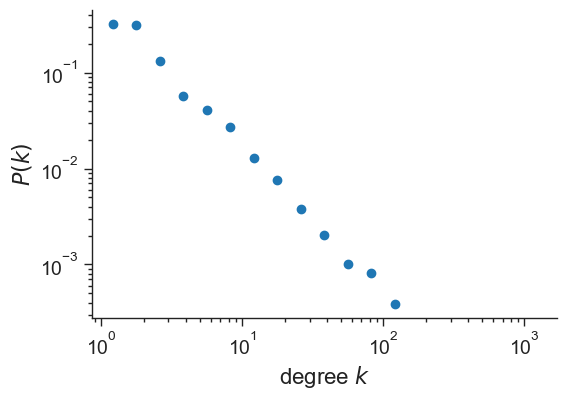

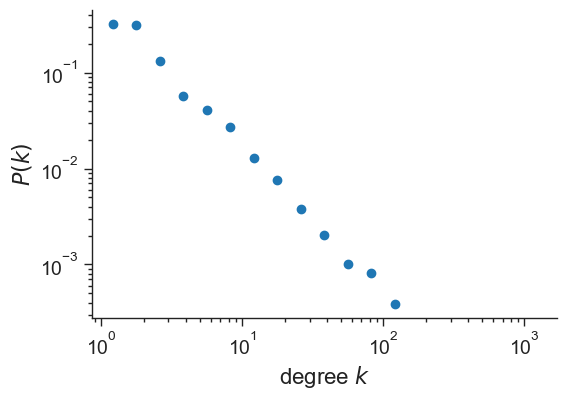

In [ ]:
# Calculating metrics for a Degree Preservation Graph
#first make sure you have copy of the graph before the doing the double edge swaps.

DP = G.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
plot_degree_dist(DP)
plot_degree_dist(G)

#then we plot the degree distribution of original graph G and swapped graph DP
#these two plots should be same.
#then we do the same analysis on the these random graphs.

In [ ]:
# Let's create the ensemble.

clustering_DP = []
short_path_DP = []

for i in range(100): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

0.4727073625140769
0.010403409193664278
2.587564729458918
0.009806172369589581


In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Airports'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([short_path_ER,short_path_DP], positions=[1,2])
plt.plot(3,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Airports'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,3.5])
plt.show()

***

## Now it's your turn

You also have networks for:

- Dolphin social network
- Football network

You can also visit the ICON to try out more networks.

Examine their clustering and shortest path lengths and compare to suitable random networks. Are they higher or lower than expected? What might this mean?

In [ ]:
# Read in the Dolphin network
#loads the txt file into grpah 'G'
#DolphinG = nx.read_weighted_edgelist("dolphins.gnl")
DolphinG = nx.read_gml("dolphins.gml")
print(DolphinG.number_of_nodes())
print(DolphinG.number_of_edges())
# Let's plot the degree distribution, by calling the function defined above.

plot_degree_dist(DolphinG)
# ...and calculate the clustering coefficient and average path length

Dolphin_C = np.mean(list(nx.clustering(DolphinG).values()))
Dolphin_d = nx.average_shortest_path_length(DolphinG,weight=None)

print("Average Clustering Coefficient: ", Dolphin_C)
print("Average Shortest Path: ", Dolphin_d)

# C --> clustering coeff
# d --> Average shortest path.

62
159
Average Clustering Coefficient:  0.2589582460550202
Average Shortest Path:  3.3569539925965097


Comparing to an Erdos-Renyi Graph of similar size

In [ ]:
GN = len(DolphinG.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(DolphinG.edges())
p = actual_L/max_L

# we are using (n,p) model for Erdos-Renyi graphs
# n --> number of nodes (GN)
# p --> probability, calculated above.

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

0.08183667811473788
0.02198606286301144
2.6679439450026443
0.10614428943518897


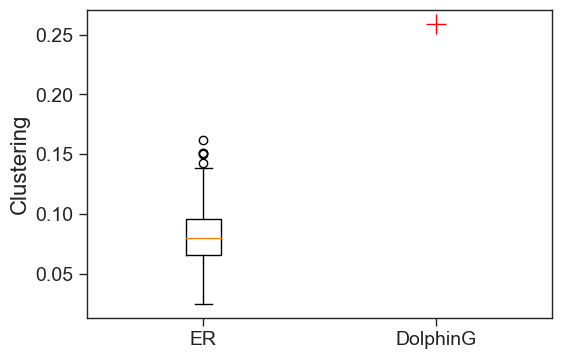

In [ ]:
# This is just one instance of a random graph. We need to create an ensemble.

clustering_ER = []
short_path_ER = []

for i in range(1000): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:                                                   #if the graph is not connected, we will ignore that graph, then we calculate the shortest path lengt values
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_ER)
plt.plot(2,Dolphin_C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','DolphinG'])
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()

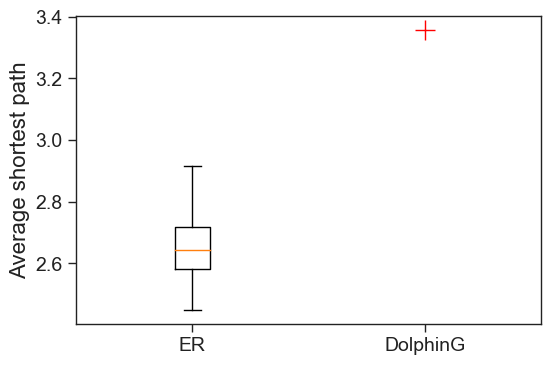

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_ER)
plt.plot(2,Dolphin_d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','DolphinG'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,2.5])
plt.show()

## Is an ER network a fair comparison?

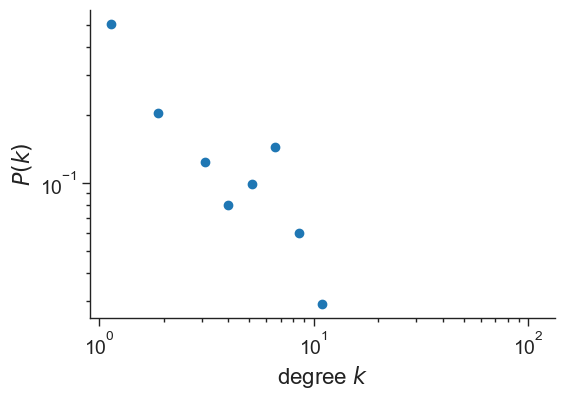

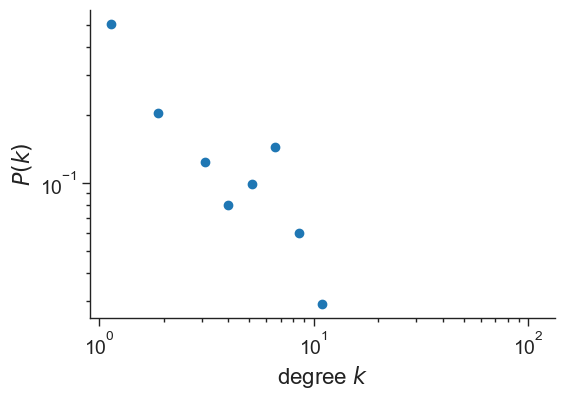

In [ ]:
# Calculating metrics for a Degree Preservation Graph
#first make sure you have copy of the graph before the doing the double edge swaps.

DP = DolphinG.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*DolphinG.number_of_edges(),max_tries=100000)
plot_degree_dist(DP)
plot_degree_dist(DolphinG)

#then we plot the degree distribution of original graph G and swapped graph DP
#these two plots should be same.
#then we do the same analysis on the these random graphs.

0.09572456244472373
0.019567567818423587
2.7127022739291378
0.03940695862624563


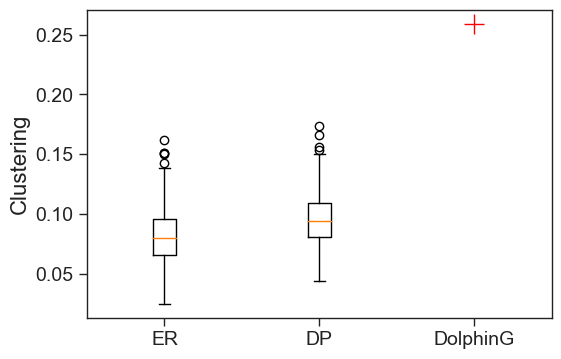

In [ ]:
# Let's create the ensemble.

clustering_DP = []
short_path_DP = []

for i in range(1000): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=10*DolphinG.number_of_edges(),max_tries=100000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,Dolphin_C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','DolphinG'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

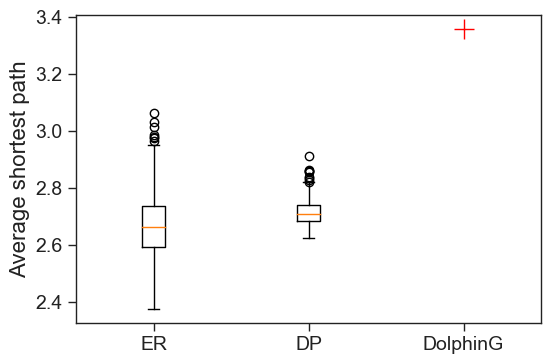

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([short_path_ER,short_path_DP], positions=[1,2])
plt.plot(3,Dolphin_d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','DolphinG'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,3.5])
plt.show()

***

In [ ]:
# Read in the Football network
#loads the txt file into grpah 'G'
FootballG = nx.read_gml("football.gml")
print(FootballG.number_of_nodes())
print(FootballG.number_of_edges())
# Let's plot the degree distribution, by calling the function defined above.

plot_degree_dist(FootballG)
# ...and calculate the clustering coefficient and average path length

Football_C = np.mean(list(nx.clustering(FootballG).values()))
Football_d = nx.average_shortest_path_length(FootballG,weight=None)

print("Average Clustering Coefficient: ", Football_C)
print("Average Shortest Path: ", Football_d)

# C --> clustering coeff
# d --> Average shortest path.

115
613
Average Clustering Coefficient:  0.40321601104209803
Average Shortest Path:  2.5081617086193746


In [ ]:
GN = len(FootballG.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(FootballG.edges())
p = actual_L/max_L

# we are using (n,p) model for Erdos-Renyi graphs
# n --> number of nodes (GN)
# p --> probability, calculated above.

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

0.09328461176855973
0.007647258511711311
2.2445636918382914
0.0314405956716241


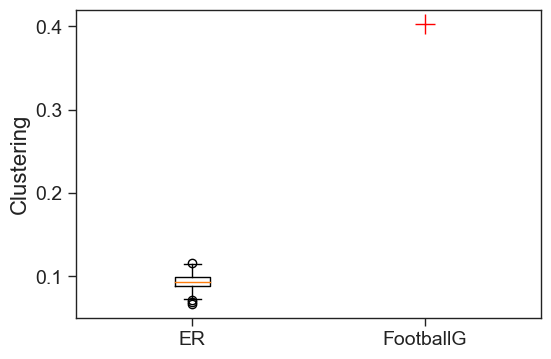

In [ ]:
# This is just one instance of a random graph. We need to create an ensemble.

clustering_ER = []
short_path_ER = []

for i in range(1000): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:                                                   #if the graph is not connected, we will ignore that graph, then we calculate the shortest path lengt values
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))
fig = plt.figure(figsize=(6,4))

plt.boxplot(clustering_ER)
plt.plot(2,Football_C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','FootballG'])
plt.ylabel('Clustering')
plt.xlim([0.5,2.5])
plt.show()

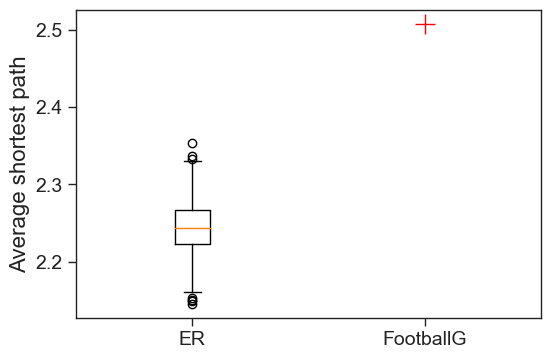

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_ER)
plt.plot(2,Football_d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['ER','FootballG'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,2.5])
plt.show()

## Is an ER network a fair comparison?

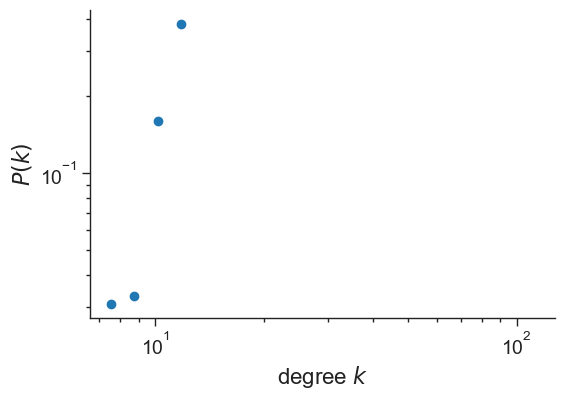

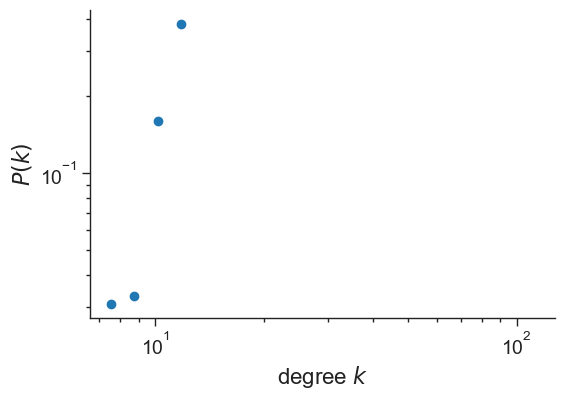

In [ ]:
# Calculating metrics for a Degree Preservation Graph
#first make sure you have copy of the graph before the doing the double edge swaps.

DP = FootballG.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*FootballG.number_of_edges(),max_tries=100000)
plot_degree_dist(DP)
plot_degree_dist(FootballG)

#then we plot the degree distribution of original graph G and swapped graph DP
#these two plots should be same.
#then we do the same analysis on the these random graphs.

In [ ]:
# Let's create the ensemble.

clustering_DP = []
short_path_DP = []

for i in range(1000): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=10*FootballG.number_of_edges(),max_tries=100000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,Football_C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','FootballG'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()

0.07918504297634732
0.005782476808643643
2.239099313501144
0.005182477567924845


In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([short_path_ER,short_path_DP], positions=[1,2])
plt.plot(3,Football_d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','FootballG'])
plt.ylabel('Average shortest path')
plt.xlim([0.5,3.5])
plt.show()

: 